<a href="https://colab.research.google.com/github/sanjulikasharma/MachineLearning/blob/main/Class_Weights_of_imbalanced_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Load required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Load your dataset
data = pd.read_csv("/content/Credit Score Classification Dataset.csv")

In [40]:
data['Credit Score'].value_counts()

1    113
0     36
2     15
Name: Credit Score, dtype: int64

In [14]:
# Encode categorical columns to numerical
label_encoders = {}
for column in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Preprocess the data
X = data.drop("Credit Score", axis=1)
y = data["Credit Score"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights for the imbalanced dataset
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))


In [15]:
class_weight_dict

{0: 1.4086021505376345, 1: 0.48518518518518516, 2: 4.366666666666666}

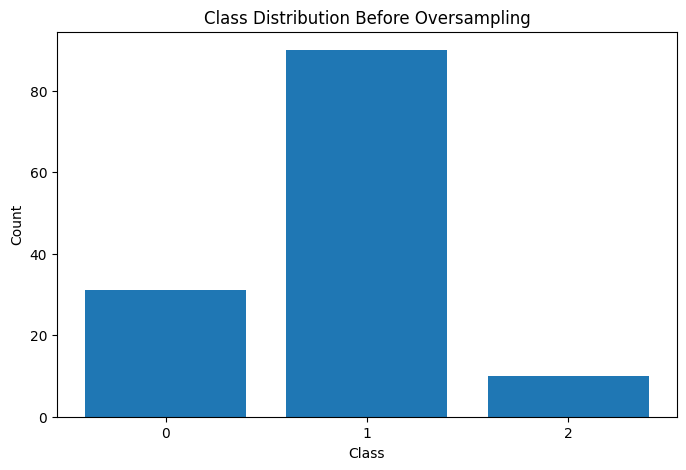

In [16]:
# Visualize class distribution before oversampling
plt.figure(figsize=(8, 5))
plt.bar(np.unique(y_train), np.bincount(y_train))
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(np.unique(y_train))
plt.show()

In [18]:
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with class weights
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model with oversampled data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weight_dict)

Epoch 1/10
5/5 [==============================] - 1s 5ms/step - loss: 5668.5518 - accuracy: 0.2366
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 579.6683 - accuracy: 0.4122
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 626.4594 - accuracy: 0.6870
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 787.9131 - accuracy: 0.6870
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 827.4133 - accuracy: 0.6870
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 800.1688 - accuracy: 0.6870
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 760.3868 - accuracy: 0.6870
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 715.9006 - accuracy: 0.6870
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 611.8096 - accuracy: 0.6870
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 487.1948 - accuracy: 0.6870


In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model using classification report
report = classification_report(y_test, y_pred_binary)
print(report)

2/2 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.70      1.00      0.82        23
           2       0.00      0.00      0.00         5

    accuracy                           0.70        33
   macro avg       0.23      0.33      0.27        33
weighted avg       0.49      0.70      0.57        33



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
